In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



### 데이터 가져오기

In [16]:
# train.csv 파일을 pandas DataFrame으로 읽어들임
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')



### 칼럼정리하기

In [17]:
# datetime 컬럼을 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# 칼럼분리
X = train.drop(columns=["count","minute","second","datetime"])
y = train['count']

### 학습하기&결과출력

In [18]:
# 훈련,테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)

# MSE, RMSE 계산 및 출력
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 1.9695556800416788e-25
RMSE: 4.4379676430114705e-13


### 시각화

<Figure size 1152x720 with 0 Axes>

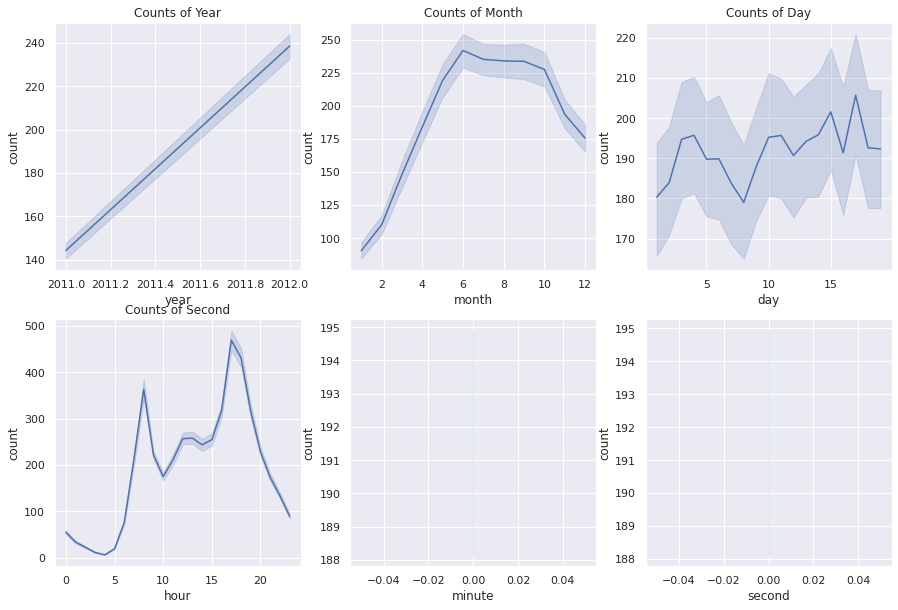

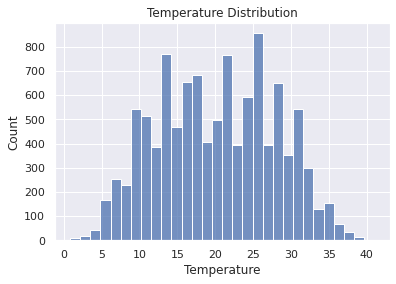

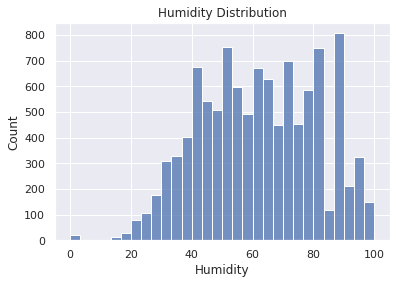

In [20]:
# 스타일 설정
sns.set(style="darkgrid")

# 그림 크기 설정
plt.figure(figsize=(16, 10))

# 스타일 설정
sns.set(style="darkgrid")

# subplot을 사용하여 6개의 그래프를 한 번에 시각화
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 연도별 대여수 추이
sns.lineplot(data=train, x="year", y="count", ax=axs[0, 0])
axs[0, 0].set(title="Counts of Year")

# 월별 대여수 추이
sns.lineplot(data=train, x="month", y="count", ax=axs[0, 1])
axs[0, 1].set(title="Counts of Month")

# 일별 대여수 추이
sns.lineplot(data=train, x="day", y="count", ax=axs[0, 2])
axs[0, 2].set(title="Counts of Day")

# 시간별 대여수 추이
sns.lineplot(data=train, x="hour", y="count", ax=axs[1, 0])
axs[1, 0].set(title="Counts of Hour")

# 분별 대여수 추이
sns.lineplot(data=train, x="minute", y="count", ax=axs[1, 1])
axs[1, 0].set(title="Counts of Minute")

# 초별 대여수 추이
sns.lineplot(data=train, x="second", y="count", ax=axs[1, 2])
axs[1, 0].set(title="Counts of Second")

plt.show()

# 그래프 제목 설정
axs[0, 0].set(title="Trends of Year")
axs[0, 1].set(title="Trends of Month")
axs[0, 2].set(title="Trends of Day")
axs[1, 0].set(title="Trends of Hour")

plt.show()

# 온도 히스토그램
sns.histplot(data=X, x='temp', bins=30)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Temperature Distribution")
plt.show()

# 습도 히스토그램
sns.histplot(data=X, x='humidity', bins=30)
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.title("Humidity Distribution")
plt.show()